# Module 12: Data Gathering, Custom Exceptions, Abstracting

## Topic 1: Gathering Data Using Classes

### Let's learn how to import data from a CSV file

### A CSV file is a file format that is structured so that many different applications are able to access the data easily.  
### CSV stands for comma separated value

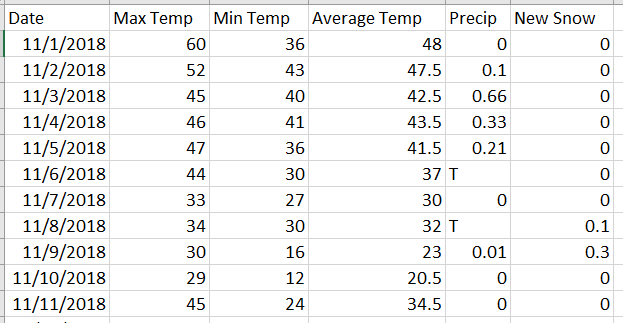

In [1]:
import csv
with open('NOAA Des Moines Weather data 11_18 to 10_19.csv') as csv_file:
    csv_reader = csv.reader(csv_file,   )
    line_count = 0
    for row in csv_reader:
        # I'm treating the first row different because it is the header row
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:  
            print(row)
            line_count += 1
    print (f'processed {line_count} rows')

Column names are Date, Max Temp, Min Temp, Average Temp, Precip, New Snow
['11/1/2018', '60', '36', '48', '0', '0']
['11/2/2018', '52', '43', '47.5', '0.1', '0']
['11/3/2018', '45', '40', '42.5', '0.66', '0']
['11/4/2018', '46', '41', '43.5', '0.33', '0']
['11/5/2018', '47', '36', '41.5', '0.21', '0']
['11/6/2018', '44', '30', '37', 'T', '0']
['11/7/2018', '33', '27', '30', '0', '0']
['11/8/2018', '34', '30', '32', 'T', '0.1']
['11/9/2018', '30', '16', '23', '0.01', '0.3']
['11/10/2018', '29', '12', '20.5', '0', '0']
['11/11/2018', '45', '24', '34.5', '0', '0']
['11/12/2018', '28', '17', '22.5', 'T', 'T']
['11/13/2018', '31', '11', '21', '0', '0']
['11/14/2018', '42', '19', '30.5', '0', '0']
['11/15/2018', '48', '21', '34.5', '0', '0']
['11/16/2018', '47', '36', '41.5', '0.01', '0']
['11/17/2018', '36', '22', '29', '0.07', '0.4']
['11/18/2018', '30', '11', '20.5', '0', '0']
['11/19/2018', '40', '19', '29.5', 'T', 'T']
['11/20/2018', '35', '19', '27', 'T', 'T']
['11/21/2018', '42', '26'

### Now that we can import data into our program, let's do some OOP, putting the data into an object with attributes

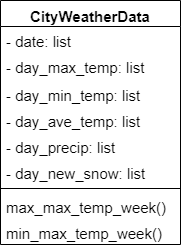

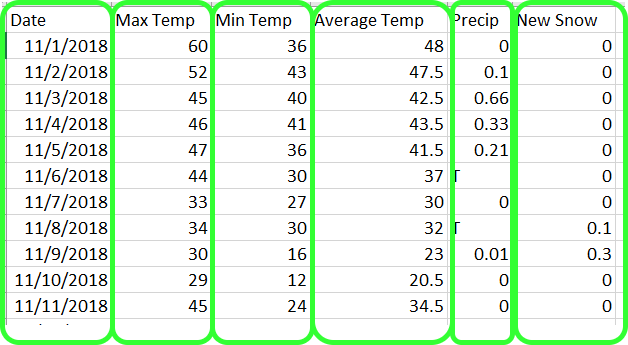

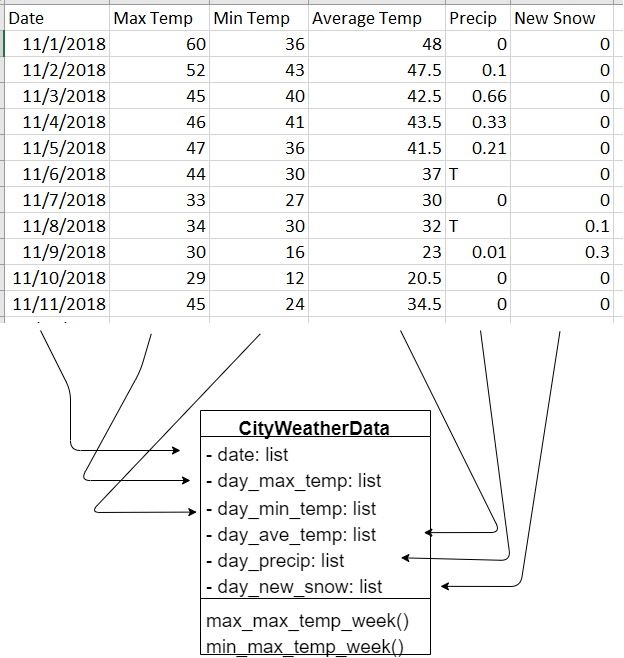

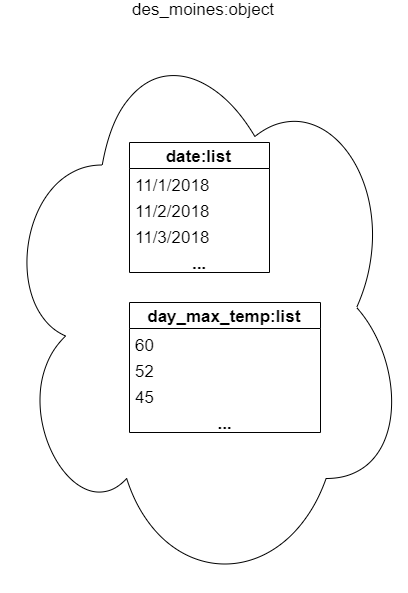

### This code uses an OrderedDict data type.  OrderedDict is just a dictionary that remembers the order items were added.  This guarantees that the items added to the dictionary can be pulled from the dictionary in the same order they were added.

In [2]:
from collections import OrderedDict

class CityWeatherData:
    def __init__(self,date,day_max_temp,day_min_temp,day_ave_temp,day_precip,day_new_snow):
        self.date = date
        self.day_max_temp = day_max_temp
        self.day_min_temp = min_temp
        self.day_ave_temp = ave_temp
        self.day_precip = precip
        self.day_new_snow = new_snow
    
    def max_max_temp_week(self):
        date_max_temp_dict = OrderedDict()
        sum_temps = 0
        date_list = []
        temp_list= []
        for r in range (len(self.date)):
            date_max_temp_dict[self.date[r]] = int(self.day_max_temp[r])
        for k,v in date_max_temp_dict.items():
            date_list.append(k)
            temp_list.append(v)
            if len(date_list) >= 7:
                if sum(temp_list)/7 > sum_temps:
                    sum_temps = sum(temp_list)/7
                    date_first = date_list[0]
                    date_last = date_list[6]
            if len(date_list) == 7:
                del date_list[0]
                del temp_list[0]
        return (f'Maximum Max Temp: {sum_temps} from {date_first} to {date_last}')
                
    def min_max_temp_week(self):
        date_max_temp_dict = OrderedDict()
        sum_temps = 1000
        date_list = []
        temp_list= []
        for r in range (len(self.date)):
            date_max_temp_dict[self.date[r]] = int(self.day_max_temp[r])
        for k,v in date_max_temp_dict.items():
            date_list.append(k)
            temp_list.append(v)
            if len(date_list) >= 7:
                if sum(temp_list)/7 < sum_temps:
                    sum_temps = sum(temp_list)/7
                    date_first = date_list[0]
                    date_last = date_list[6]
            if len(date_list) == 7:
                del date_list[0]
                del temp_list[0]
        return (f'Minimum Max Temp: {sum_temps} from {date_first} to {date_last}')

In [ ]:
#NOTE: THIS IS JUST TO DISPLAY THE LARGE CLASS IN PARTS
#from collections import OrderedDict
#class CityWeatherData:
#    def __init__(self,date,day_max_temp,day_min_temp,day_ave_temp,day_precip,day_new_snow):
#        self.date = date
#        self.day_max_temp = day_max_temp
#        self.day_min_temp = min_temp
#        self.day_ave_temp = ave_temp
#        self.day_precip = precip
#        self.day_new_snow = new_snow

In [ ]:
#NOTE: THIS IS JUST TO DISPLAY THE LARGE CLASS IN PARTS
#def max_max_temp_week(self):
#        date_max_temp_dict = OrderedDict()
#        sum_temps = 0
#        date_list = []
#        temp_list= []
#        for r in range (len(self.date)):
#            date_max_temp_dict[self.date[r]] = int(self.day_max_temp[r])
#        for k,v in date_max_temp_dict.items():
#            date_list.append(k)
#            temp_list.append(v)
#            if len(date_list) >= 7:
#                if sum(temp_list)/7 > sum_temps:
#                    sum_temps = sum(temp_list)/7
#                    date_first = date_list[0]
#                    date_last = date_list[6]
#            if len(date_list) == 7:
#                del date_list[0]
#                del temp_list[0]
#        return (f'Maximum Max Temp: {sum_temps} from {date_first} to {date_last}')

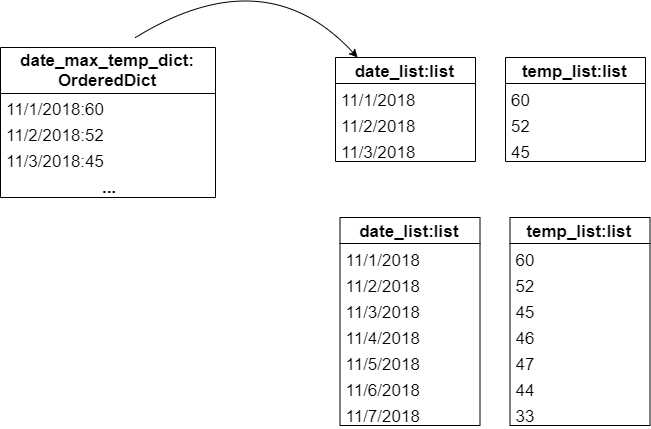

### Now that we have our class with some methods, we can instantiate our new des_moines object

In [3]:
import csv
with open('NOAA Des Moines Weather data 11_18 to 10_19.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    # Short way to initialize multiple empty lists
    date,max_temp,min_temp,ave_temp,precip,new_snow = ([] for i in range(6))
    
    for row in csv_reader:
        # skip the first line in the file because it is the header
        if line_count == 0:
            line_count += 1
            continue
        date.append(row[0])
        max_temp.append(row[1])
        min_temp.append(row[2])
        ave_temp.append(row[3])
        precip.append(row[4])
        new_snow.append(row[5])
    des_moines = CityWeatherData(date,max_temp,min_temp,ave_temp,precip,new_snow)

In [ ]:
print(des_moines)

In [4]:
print(des_moines.max_max_temp_week())
print(des_moines.min_max_temp_week())

Maximum Max Temp: 92.0 from 7/14/2019 to 7/20/2019
Minimum Max Temp: 17.285714285714285 from 1/25/2019 to 1/31/2019


## Topic 2: Custom Exceptions

### While Python does come with a significant number of built in exceptions, there are times when you may want to have a specific exception class for your programs

### Custom exception classes should inherit the built in "Exception" class

### A simple example of a custom exception class is just a defined class with pass as the body.  You should have some kind of commenting in these classes explaining what the exception is and when it happens.

In [5]:
class NumberTooLow(Exception):
    # This custom exception gets raised if the value entered is too low
    pass

class NumberTooHigh(Exception):
    # This custom exception gets raised if the value entered is too high
    pass

### When using these simple exception classes, you can just pass the error message when raising the exception.

In [7]:
your_number = int(input("Give me an integer between 1 and 10: "))
if your_number < 1:
    raise NumberTooLow("That number is lower than asked for")
elif your_number > 10:
    raise NumberTooHigh("That number is higher than asked for")


Give me an integer between 1 and 10: 33


NumberTooHigh: That number is higher than asked for

### Custom exception classes can also have default messages

In [8]:
class NumberTooLow(Exception):
    # This custom exception gets raised if the value entered is too low
    def __init__(self,message=None):
        if message==None:
            message="Your number was far too low for my tastes"
        super(NumberTooLow, self).__init__(message)
    
class NumberTooHigh(Exception):
    # This custom exception gets raised if the value entered is too high
    def __init__(self,message=None):
        if message==None:
            message="What kind of crazy high number are you sending me?"
        super(NumberTooHigh,self).__init__(message)
    pass

In [10]:
your_number = int(input("Give me an integer between 1 and 10: "))
if your_number < 1:
    raise NumberTooLow("this is a small number")
elif your_number > 10:
    raise NumberTooHigh


Give me an integer between 1 and 10: 45


NumberTooHigh: What kind of crazy high number are you sending me?

## Topic 3: Abstraction

### Abstract classes are special classes that cannot be instantiated.  Any class that inherits these abstract classes must override any abstract methods of the abstract class

### In the same way that a class can be considered a blueprint for objects, an abstract class can be considered a blueprint for other classes

In [12]:
from abc import ABC, abstractmethod

class Person(ABC):
    @abstractmethod
    def age_range(self):
        return "A person's age range is between 0 and 120"
    
class Child(Person):
    def age_ranges(self):
        return "my age is between 0 and 18."
jimmy = Child()
print(jimmy.age_range())

TypeError: Can't instantiate abstract class Child with abstract methods age_range

### A class that is derived from an abstract class cannot be instantiated unless all of its abstract methods are overridden

In [15]:
from abc import ABC, abstractmethod

class Person(ABC):
    def number_of_limbs(self):
        return "A person typically has 4 limbs"
    
    @abstractmethod
    def age_range(self):
        return "A person's age range is between 0 and 120"
    
class Child(Person):
    def age_range(self):
        return "my age is between 0 and 18. " + super().age_range()

jimmy = Child()
print(jimmy.age_range())
print(jimmy.number_of_limbs())
billy = Person()

my age is between 0 and 18. A person's age range is between 0 and 120
A person typically has 4 limbs


TypeError: Can't instantiate abstract class Person with abstract methods age_range